# LSE Machine Learning: Practical Applications

## Module 6 Unit 2 IDE Activity (assessment) | Apply ensemble learning to a data set

### In this notebook, you will revisit the process of building and interpreting a regression tree in R and apply ensemble methods to the created tree object.

The instructions for this IDE activity are positioned as text cells before each step. You are required to read the text cells above each code cell, familiarise yourself with the required step, then execute it. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R.

1. Load the relevant packages.

In order to apply ensemble learning to a data set in R, the following packages should be loaded: tree, randomForest, and gbm. Once the packages are loaded, set the seed for reproducibility of the results.

In [1]:
# Load the required packages
library(tree)
library(randomForest)
library(gbm)

# Set the seed for reproducibility
set.seed(4096)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loaded gbm 2.1.5



2. Load the data, and analyse the data format and quality distribution.

In [2]:
# Load the winequality-red.csv file
wine <- read.csv('winequality-red.csv', sep=';', stringsAsFactors=F)
# Review the data set
str(wine)
head(wine)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


3. Split the data set into training and testing sets. For this example, split the data into 70% as the training data set, and the remaining 30% as the testing set.

In [3]:
# Split into training and testing data sets
train <- sample(1:nrow(wine), nrow(wine) * 0.7)
wine.test <- wine[-train, "quality"]

**Note:** The next section includes the steps of creating the regression tree. In this example, it is not necessary to specify the tree type since the algorithm builds the tree based on the variable that is predicted.

4. Create and review the regression tree from the training data set using the following steps: 

-Apply the `tree` function to create the tree.

-Print the summary of the tree using the `summary` function.

-Plot the tree using the `plot` function.

-Add text labels to the tree using the `text` function.


Regression tree:
tree(formula = quality ~ ., data = wine, subset = train)
Variables actually used in tree construction:
[1] "alcohol"              "sulphates"            "total.sulfur.dioxide"
[4] "volatile.acidity"     "pH"                  
Number of terminal nodes:  12 
Residual mean deviance:  0.4068 = 450.3 / 1107 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5030 -0.3875 -0.1429  0.0000  0.4966  2.0560 

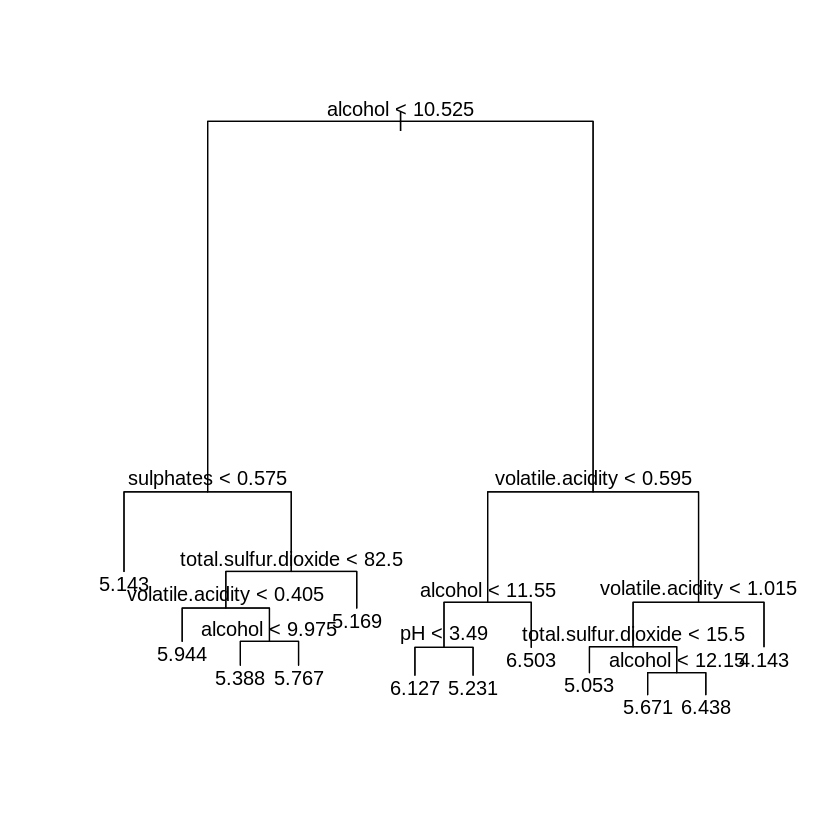

In [4]:
tree.wine <- tree(quality ~ ., wine, subset = train)

summary(tree.wine)

plot(tree.wine)
text(tree.wine, pretty = 0)

**Pause and reflect:** How many terminal nodes does your tree have?

5. Evaluate the model's prediction accuracy by applying the following steps:

-Make a prediction using the tree to obtain a baseline.

-Plot the prediction.

-Compute the test MSE to be used as the baseline for comparing the impact of other approaches.

[1] 0.4664985

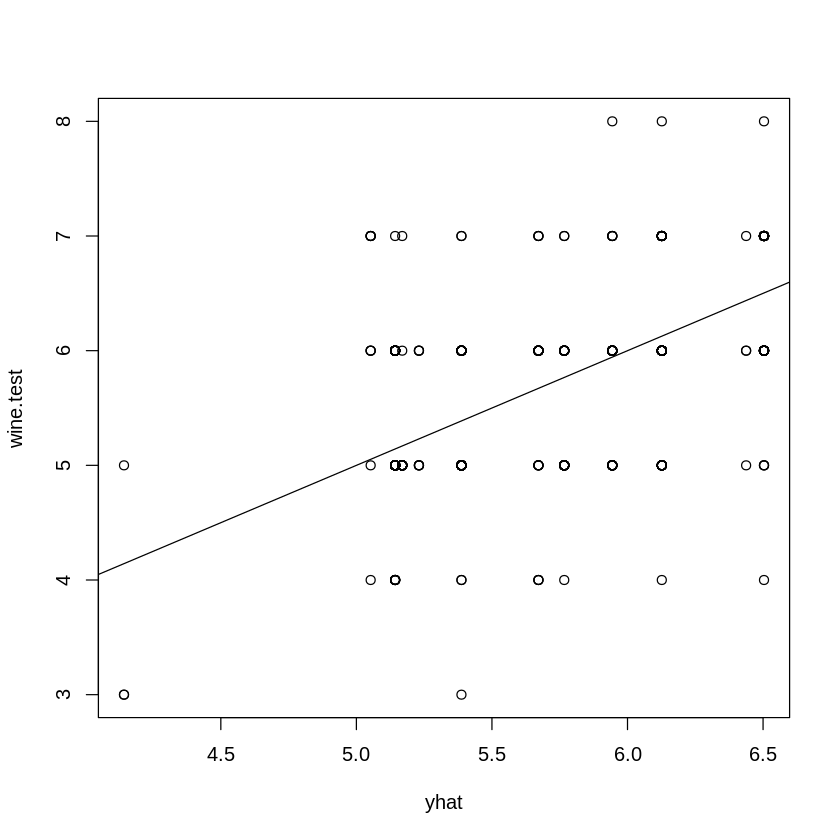

In [5]:
# Predict using the tree to obtain a baseline
yhat <- predict(tree.wine, newdata = wine[-train,])

# Plot
plot(yhat, wine.test)
abline(0, 1)

# Compute the test MSE
mean((yhat - wine.test) ^ 2)

**Pause and reflect:** Evaluate the output above. This plot provides a comparison between the true value and the predicted value. It is preferred that all points are close to or on the line _y.hat_ = _y_.

How does the prediction calculated in the output compare to a random guess?

6. To improve the performance of the model, ensemble learning should be applied. First, prune the tree by applying cross-validation.

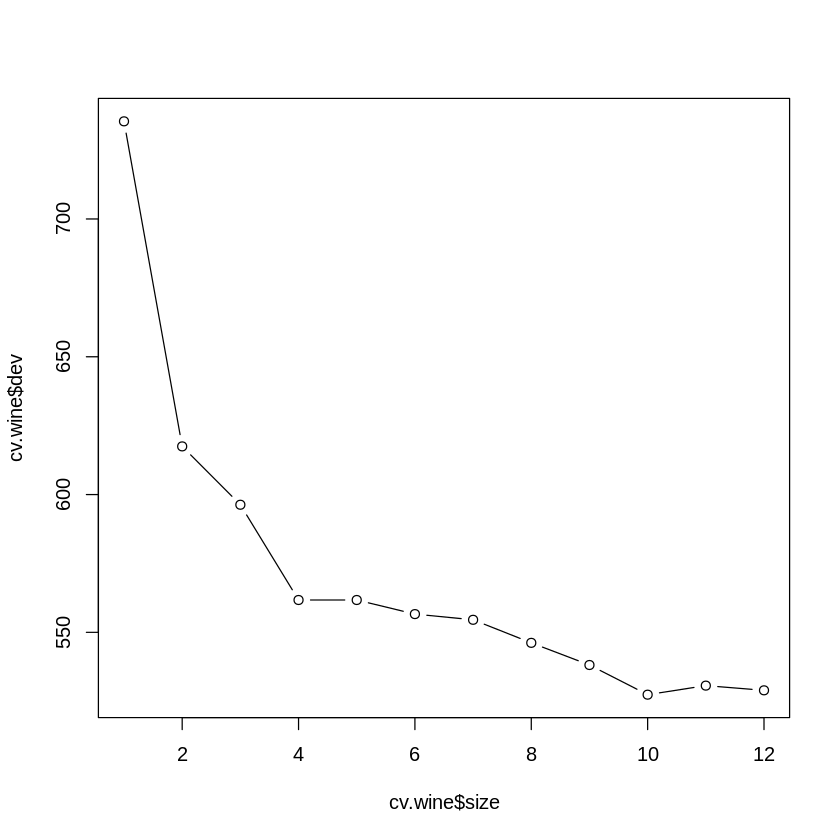

In [6]:
# Perform cross-validation
cv.wine <- cv.tree(tree.wine)
plot(cv.wine$size, cv.wine$dev, type = "b")

7. Prune the tree using the 10 best variables, and plot the pruned tree.

**Hint:** Use the `prune` and `plot` functions respectively.

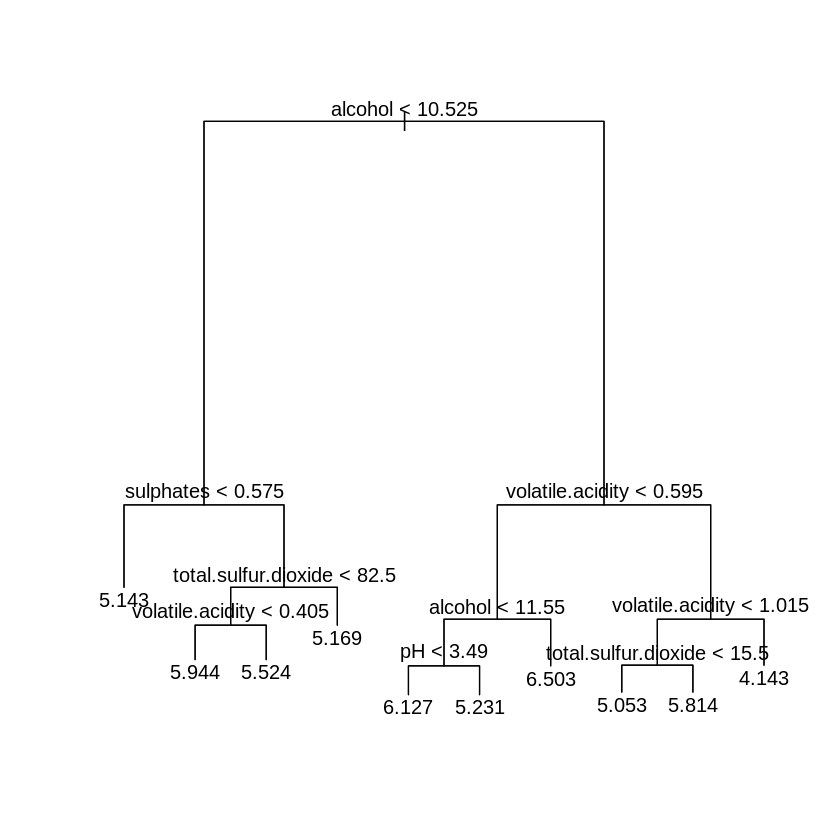

In [7]:
prune.wine <- prune.tree(tree.wine, best = 10)

plot(prune.wine)
text(prune.wine, pretty = 0)

8. Predict, plot, and calculate the MSE of the pruned tree.

[1] 0.4639849

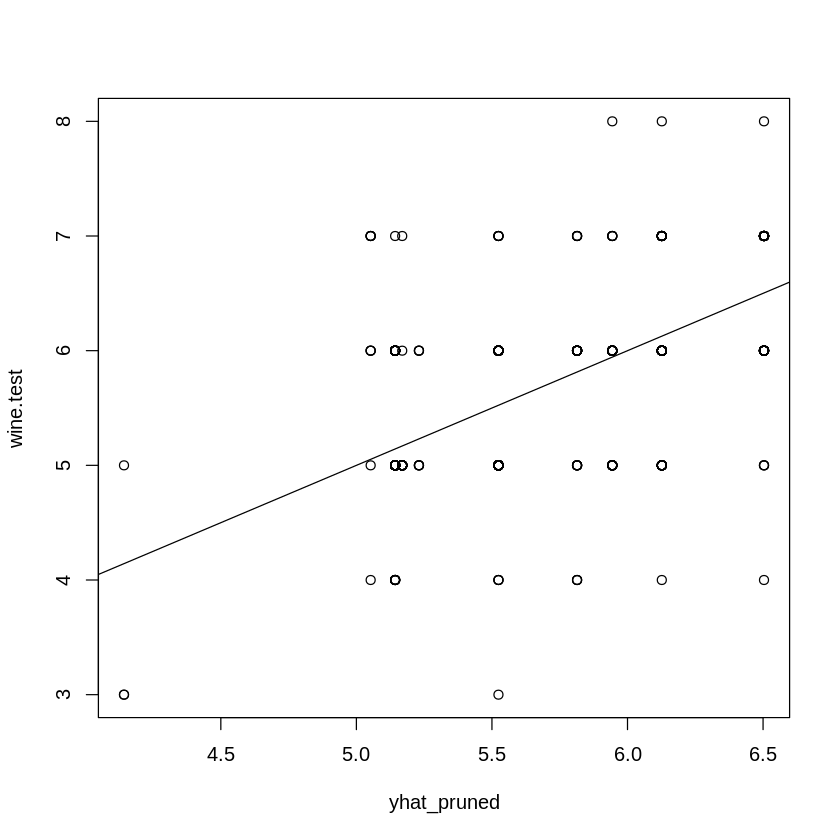

In [8]:
# Predict using the pruned tree on the test data set
yhat_pruned <- predict(prune.wine, newdata = wine[-train,])

# Plot pruned tree
plot(yhat_pruned, wine.test)
abline(0, 1)

# Compute the test MSE
mean((yhat_pruned - wine.test) ^ 2)

**Pause and reflect:** How does the test MSE compare to the training MSE calculated earlier in this notebook?

**Note:** To further improve the predictive power of the model, other ensemble learning methods can be applied, including bagging, random forests, and boosting.


### Bagging

9. Create a model titled `bag.wine` using the `randomForest` function, and display the model output. 

**Hint:** You are required to predict the quality, and specify the data and the subset to be used. Apply the parameter `mtry = 12` (the total number of independent variables), and set `importance = TRUE`. Remember to display the model output.

In [9]:
set.seed(4096)
bag.wine <- randomForest(quality~., 
                           data=wine, 
                           subset=train, 
                           mtry=11, 
                           importance=TRUE)
bag.wine


Call:
 randomForest(formula = quality ~ ., data = wine, mtry = 11, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 11

          Mean of squared residuals: 0.366602
                    % Var explained: 44.18

10. Predict, print, and calculate the test MSE of the model.

[1] 0.3335351

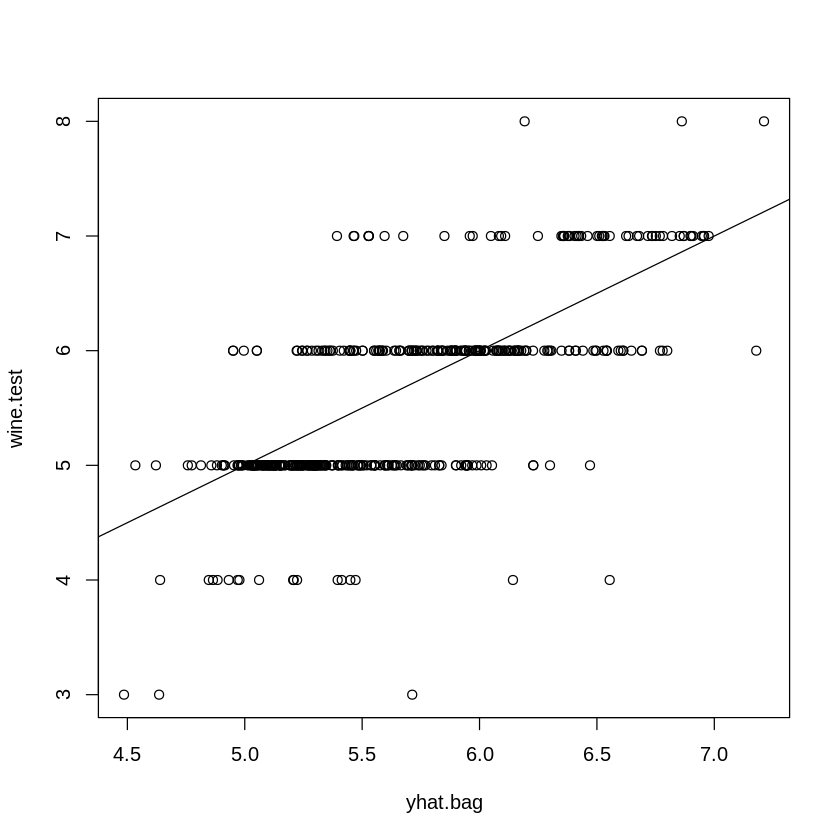

In [10]:
# Demonstrate bagging
yhat.bag <-predict(bag.wine, newdata=wine[-train,])
plot(yhat.bag, wine.test)
abline(0,1)

# Compute the test MSE
mean((yhat.bag-wine.test)^2)

11. Plot the table and figures for variable importance using the `importance` and `varImpPlot` functions.

,%IncMSE,IncNodePurity
fixed.acidity,22.81918,38.54871
volatile.acidity,38.54375,93.25297
citric.acid,17.40120,35.19758
residual.sugar,12.52304,40.87087
chlorides,22.72296,45.07849
free.sulfur.dioxide,22.25446,36.15325
total.sulfur.dioxide,36.87340,57.51301
density,27.08897,38.15105
pH,19.76049,36.09433
sulphates,47.30084,94.72456


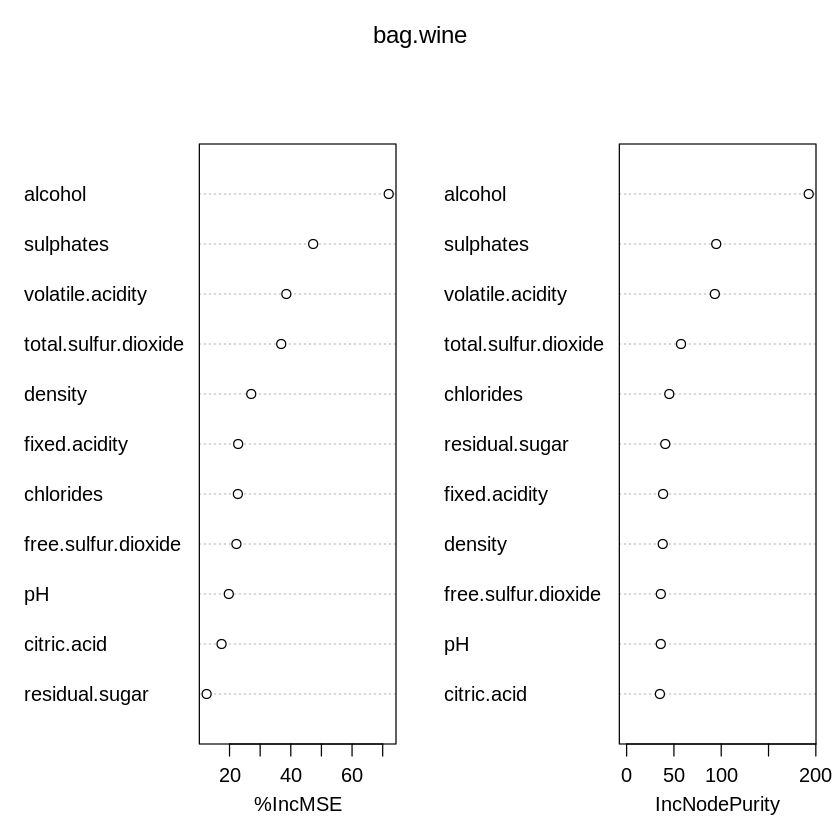

In [11]:
importance(bag.wine)
varImpPlot(bag.wine)

**Pause and reflect:** Which are the three most important variables?

### Random forests

12. Create a random forest titled `rf.wine` using the `randomForest` package.

**Note:** Specify the data and subset to be used, and set the parameter as `mtry = 4` (square root of _p_, rounded up), `importance = TRUE`, and `n.tree = 2000`.

In [12]:
set.seed(4096)
rf.wine<-randomForest(quality~., 
                         data=wine, 
                         subset=train, 
                         mtry=4, 
                         importance=TRUE, 
                         n.tree = 2000)

13. Predict and calculate the test MSE of the model.

In [13]:
# Predict
yhat.rf <-predict(rf.wine, 
                  newdata=wine[-train,])

# Calculate the test MSE
mean((yhat.rf-wine.test)^2)

[1] 0.3306128

**Pause and reflect:** How does this model's MSE compare to the model's performance prior to the application of bagging and random forests?

### Boosting

14. Use a histogram to confirm the distribution of the data.

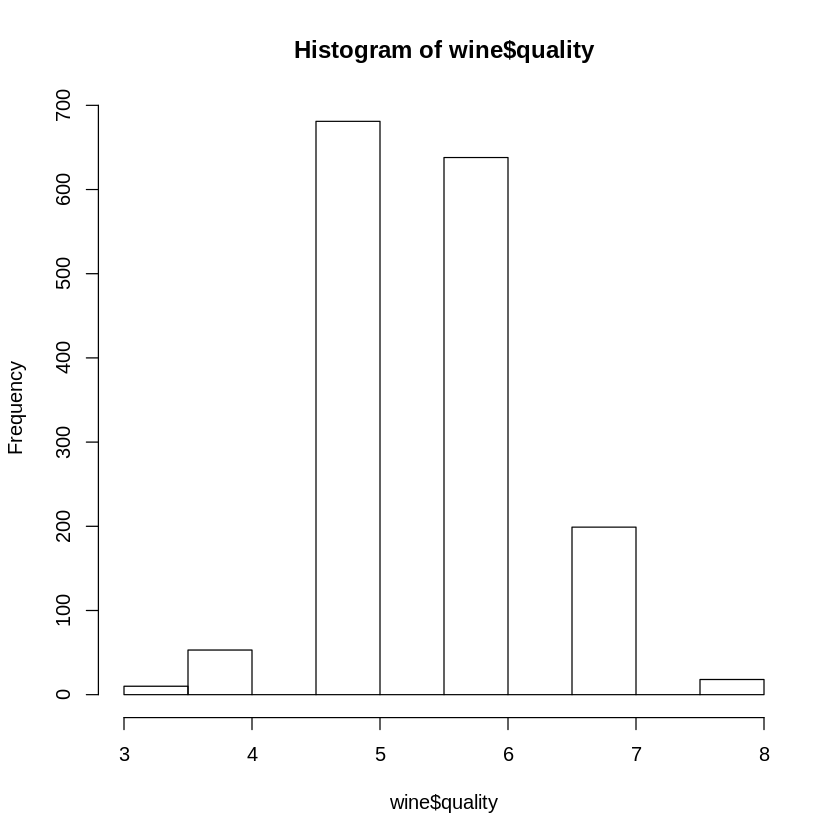

In [14]:
# Confirm normal distribution
hist(wine$quality)

15. Create the final model by using the `gbm` function with the following specifications:

-Set the data to be used

-Set the subset of the data = training data

-Distribution = "gaussian"

-n.trees = 2,000

-Interaction depth = 4

-Cross-validation folds = 3

Then, print the summary of the model.

In [15]:
set.seed(4096)
boost.wine<-gbm( quality ~ ., data = wine[train , ], distribution = "gaussian",
  n.trees = 2000, interaction.depth = 4, cv.folds=3
)

**Note:** There are many advanced methods that can be used to tune parameters to improve model performance. In the example below, some of these methods are briefly demonstrated using the built-in performance measures from the `gbm` package to determine the optimal number of trees to use. An in-depth understanding of these methods falls outside the scope of this course.

16. By using the `gmb.perf` and `print` functions, obtain the performance metrics and print the results.

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



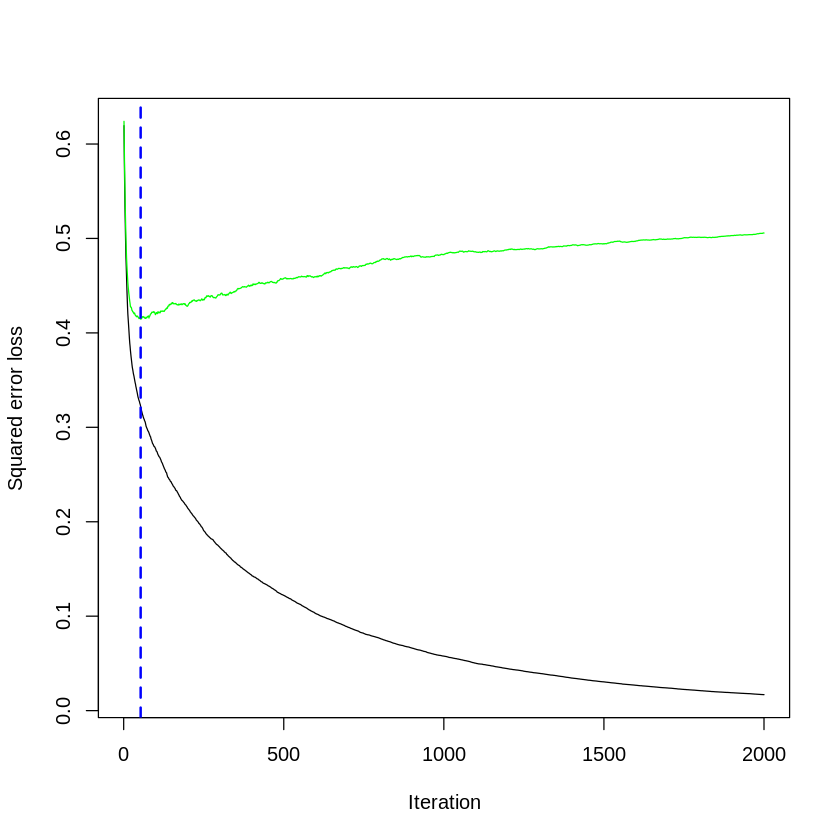

[1] 53
[1] 42
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 2000 
Equivalent Number of Parameters: 39.99 
Residual Standard Error: 0.0008272 


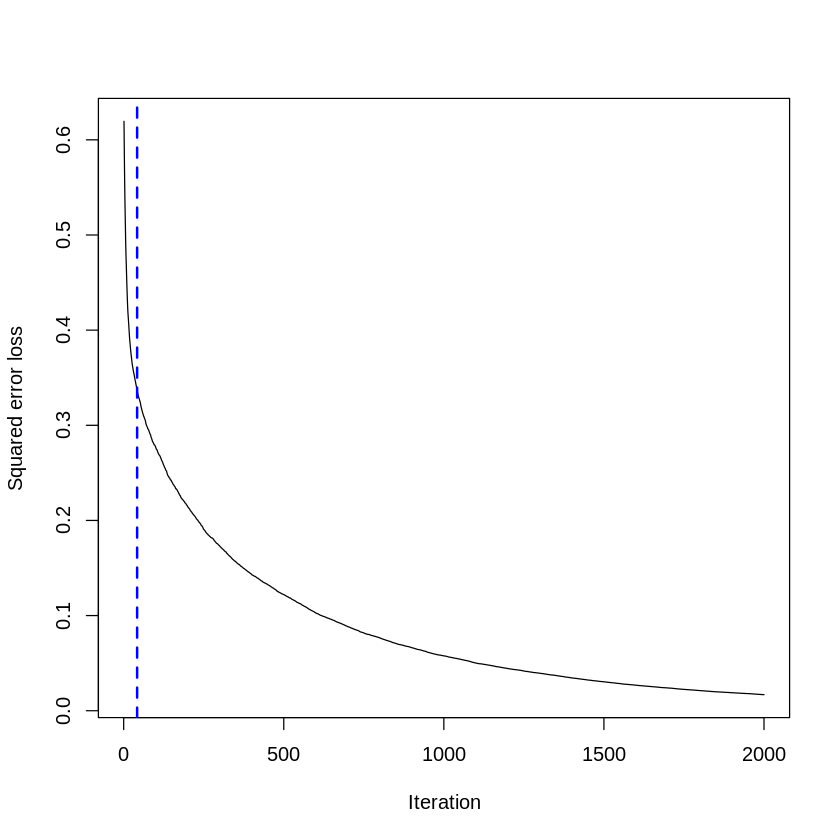

In [16]:
# Obtain the performance metrics
ntree_opt_cv <- gbm.perf(boost.wine, method = "cv")
ntree_opt_oob <- gbm.perf(boost.wine, method = "OOB")
print(ntree_opt_cv)
print(ntree_opt_oob)

17. Review the partial dependence plots to analyse the marginal effect of the variables on the output variable after integrating other variables.

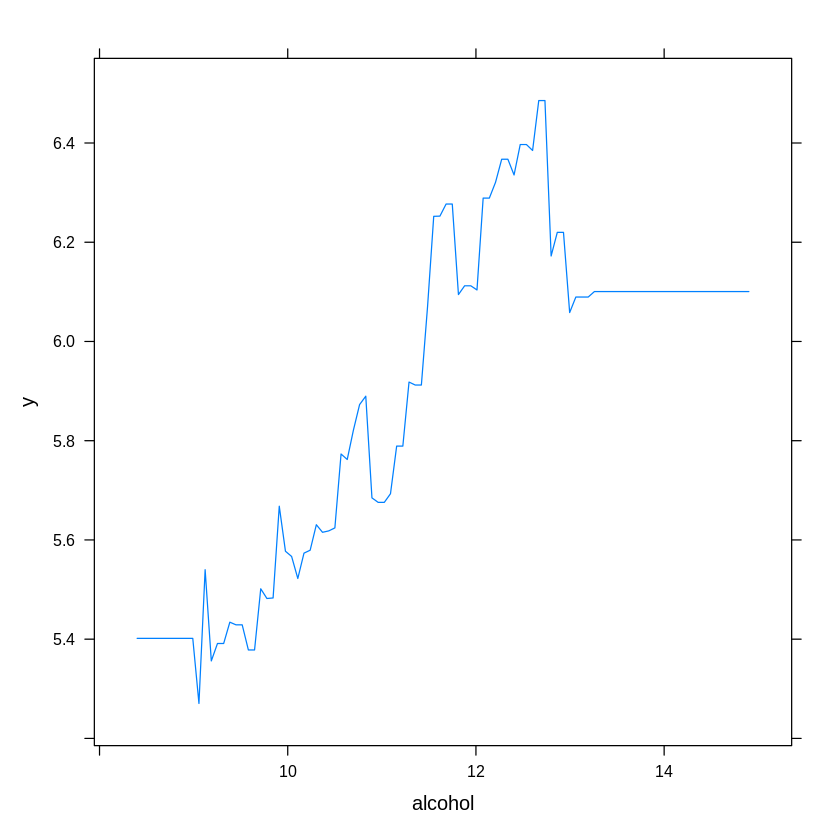

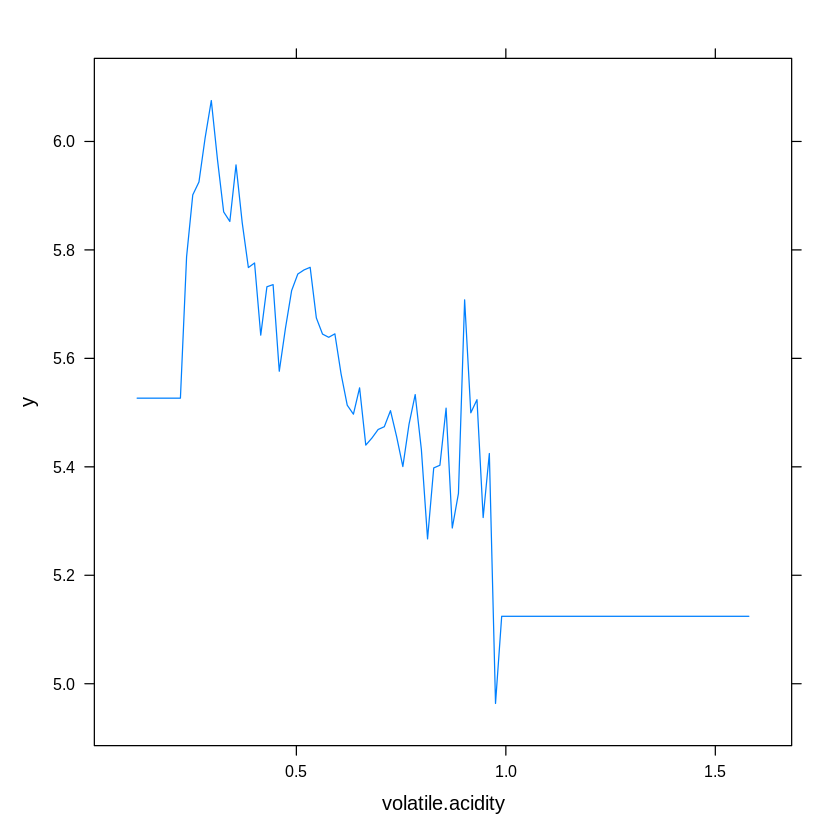

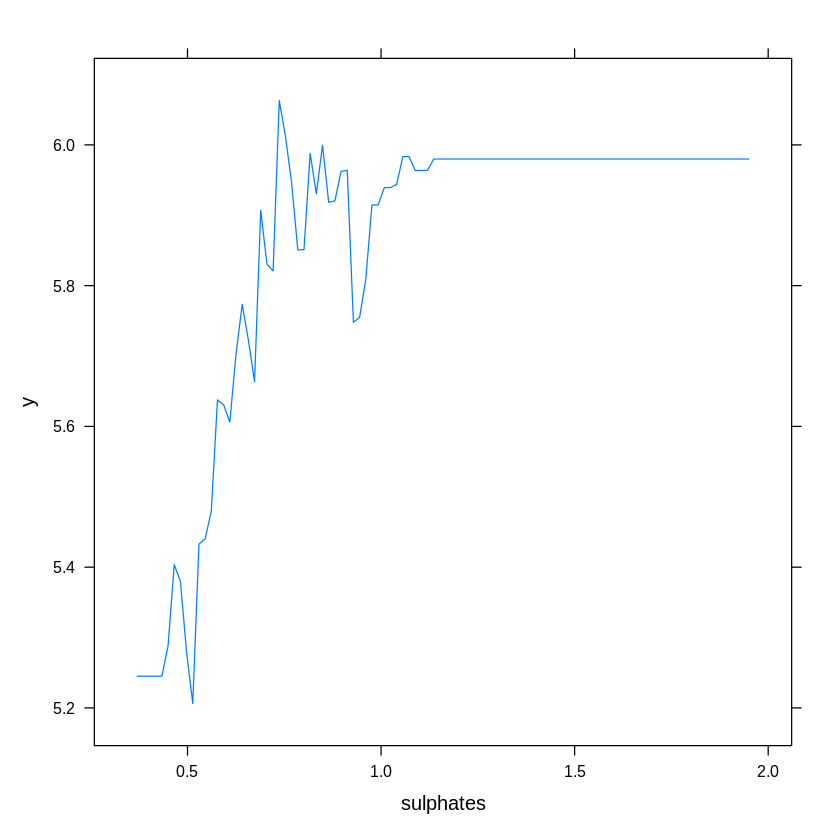

In [17]:
# Plot partial dependence plots for the three most important variables
par(mfrow = c(1, 3))
plot(boost.wine, i="alcohol")
plot(boost.wine, i="volatile.acidity")
plot(boost.wine, i="sulphates")

18. Predict and calculate the MSE for the boosted tree model.

In [18]:
yhat.boost = predict(boost.wine, 
                     newdata = wine[-train, ], 
                     n.trees = ntree_opt_cv)
mean((yhat.boost - wine.test) ^ 2)

[1] 0.3658377

**Pause and reflect:** How does this model's performance compare to the other models that were optimised using the other ensemble learning methods?

**Note:** Remember to submit this notebook after completion and navigate to the next component to share your thoughts and reflections with your peers in the small group discussion forum.
